In [ ]:
!pip install geemap
!pip install texttable 
!pip install rasterio

     |████████████████████████████████| 1.9 MB 4.0 MB/s 
     |████████████████████████████████| 130 kB 25.0 MB/s 
     |████████████████████████████████| 1.3 MB 25.9 MB/s 
     |████████████████████████████████| 1.2 MB 42.3 MB/s 
     |████████████████████████████████| 1.6 MB 24.0 MB/s 
     |████████████████████████████████| 216 kB 58.4 MB/s 
     |████████████████████████████████| 98 kB 5.8 MB/s 
     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 93 kB 812 kB/s 
     |████████████████████████████████| 3.3 MB 50.1 MB/s 
     |████████████████████████████████| 8.6 MB 34.5 MB/s 
     |████████████████████████████████| 76 kB 2.9 MB/s 
     |████████████████████████████████| 219 kB 31.8 MB/s 
     |████████████████████████████████| 97 kB 3.8 MB/s 
     |████████████████████████████████| 395 kB 27.3 MB/s 
     |████████████████████████████████| 58 kB 4.0 MB/s 
     |████████████████████████████████| 428 kB 32.1 MB/s 
     |█████████████████████

     |████████████████████████████████| 19.3 MB 1.6 MB/s 


In [ ]:
# Libraries
import ee
import geemap
import os
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.exposure import match_histograms
import time
import texttable as tt
import rasterio
from rasterio.plot import reshape_as_raster

In [ ]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')

landsat_b2 = os.path.join(out_dir, '/content/drive/MyDrive/tiff files/landsat_multi_sr_resized_B2.tif')
landsat_b3 = os.path.join(out_dir, '/content/drive/MyDrive/tiff files/landsat_multi_sr_resized_B3.tif')
landsat_b4 = os.path.join(out_dir, '/content/drive/MyDrive/tiff files/landsat_multi_sr_resized_B4.tif')

sentinel_b2 = os.path.join(out_dir, '/content/drive/MyDrive/tiff files/sentinel_B2.tif')
sentinel_b3 = os.path.join(out_dir, '/content/drive/MyDrive/tiff files/sentinel_b03.tif')
sentinel_b4 = os.path.join(out_dir, '/content/drive/MyDrive/tiff files/sentinel_b04.tif')

r_landsat_B2 = rasterio.open(landsat_b2)
r_landsat_B3 = rasterio.open(landsat_b3)
r_landsat_B4 = rasterio.open(landsat_b4)
img_landsat_B2 = r_landsat_B2.read(1)
img_landsat_B3 = r_landsat_B3.read(1)
img_landsat_B4 = r_landsat_B4.read(1)

r_sentinel_B2 = rasterio.open(sentinel_b2)
r_sentinel_B3 = rasterio.open(sentinel_b3)
r_sentinel_B4 = rasterio.open(sentinel_b4)
img_sentinel_B2 = r_sentinel_B2.read(1)
img_sentinel_B3 = r_sentinel_B3.read(1)
img_sentinel_B4 = r_sentinel_B4.read(1)

print('Landsat 8 -> band 2 shape:',img_landsat_B2.shape, '| Range (min, max): (', np.amin(img_landsat_B2), ',', np.amax(img_landsat_B2), ') | Data type: ', img_landsat_B2.dtype)
print('Landsat 8 -> band 3 shape:',img_landsat_B3.shape, '| Range (min, max): (', np.amin(img_landsat_B3), ',', np.amax(img_landsat_B3), ') | Data type: ', img_landsat_B3.dtype)
print('Landsat 8 -> band 4 shape:',img_landsat_B4.shape, '| Range (min, max): (', np.amin(img_landsat_B4), ',', np.amax(img_landsat_B4), ') | Data type: ', img_landsat_B4.dtype)
print()
print('Sentinel 2 -> band 2 shape:',img_sentinel_B2.shape, '| Range (min, max): (', np.amin(img_sentinel_B2), ',', np.amax(img_sentinel_B2), ') | Data type: ', img_sentinel_B2.dtype)
print('Sentinel 2 -> band 2 shape:',img_sentinel_B3.shape, '| Range (min, max): (', np.amin(img_sentinel_B3), ',', np.amax(img_sentinel_B3), ') | Data type: ', img_sentinel_B3.dtype)
print('Sentinel 2 -> band 2 shape:',img_sentinel_B4.shape, '| Range (min, max): (', np.amin(img_sentinel_B4), ',', np.amax(img_sentinel_B4), ') | Data type: ', img_sentinel_B4.dtype)

L8_R = np.expand_dims(img_landsat_B4, axis=2)
L8_G = np.expand_dims(img_landsat_B3, axis=2)
L8_B = np.expand_dims(img_landsat_B2, axis=2)

S2_R = np.expand_dims(img_sentinel_B4, axis=2)
S2_G = np.expand_dims(img_sentinel_B3, axis=2)
S2_B = np.expand_dims(img_sentinel_B2, axis=2)

img_L8_xs = np.concatenate((L8_R,L8_G), axis=2)
img_L8_xs = np.concatenate((img_L8_xs,L8_B), axis=2)
print('Landsat image shape: ', img_L8_xs.shape)

img_S2_xs = np.concatenate((S2_R,S2_G), axis=2)
img_S2_xs = np.concatenate((img_S2_xs,S2_B), axis=2)
print('Sentinel image shape: ', img_S2_xs.shape)

Landsat 8 -> band 2 shape: (2772, 3117) | Range (min, max): ( 0 , 16677 ) | Data type:  uint16
Landsat 8 -> band 3 shape: (2772, 3117) | Range (min, max): ( 0 , 19593 ) | Data type:  uint16
Landsat 8 -> band 4 shape: (2772, 3117) | Range (min, max): ( 0 , 21834 ) | Data type:  uint16

Sentinel 2 -> band 2 shape: (2772, 3117) | Range (min, max): ( 0 , 2566 ) | Data type:  uint32
Sentinel 2 -> band 2 shape: (2772, 3117) | Range (min, max): ( 0.0 , 2502.0 ) | Data type:  float32
Sentinel 2 -> band 2 shape: (2772, 3117) | Range (min, max): ( 0.0 , 2843.0 ) | Data type:  float32
Landsat image shape:  (2772, 3117, 3)
Sentinel image shape:  (2772, 3117, 3)


In [ ]:
matched = match_histograms(img_S2_xs, img_L8_xs, multichannel=True)


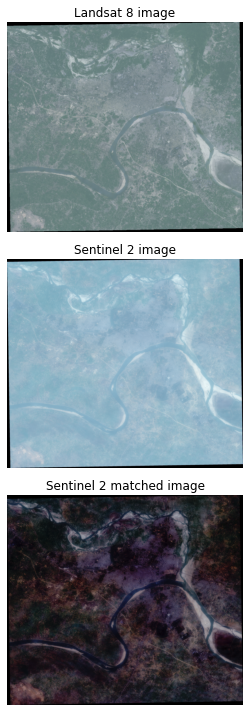

In [ ]:

L8_Rv = (((L8_R-np.amin(L8_R))/(np.amax(L8_R)-np.amin(L8_R)))*255).astype(int)
L8_Gv = (((L8_G-np.amin(L8_G))/(np.amax(L8_G)-np.amin(L8_G)))*255).astype(int)
L8_Bv = (((L8_B-np.amin(L8_B))/(np.amax(L8_B)-np.amin(L8_B)))*255).astype(int)
L8_xs = np.concatenate((L8_Rv,L8_Gv), axis=2)
L8_xs = np.concatenate((L8_xs,L8_Bv), axis=2)

S2_Rv = (((S2_R-np.amin(S2_R))/(np.amax(S2_R)-np.amin(S2_R)))*255).astype(int)
S2_Gv = (((S2_G-np.amin(S2_G))/(np.amax(S2_G)-np.amin(S2_G)))*255).astype(int)
S2_Bv = (((S2_B-np.amin(S2_B))/(np.amax(S2_B)-np.amin(S2_B)))*255).astype(int)
S2_xs = np.concatenate((S2_Rv,S2_Gv), axis=2)
S2_xs = np.concatenate((S2_xs,S2_Bv), axis=2)

S2_RvM = (((matched[:,:,0]-np.amin(matched[:,:,0]))/(np.amax(matched[:,:,0])-np.amin(matched[:,:,0])))*255).astype(int)
S2_GvM = (((matched[:,:,1]-np.amin(matched[:,:,1]))/(np.amax(matched[:,:,1])-np.amin(matched[:,:,1])))*255).astype(int)
S2_BvM = (((matched[:,:,2]-np.amin(matched[:,:,2]))/(np.amax(matched[:,:,2])-np.amin(matched[:,:,2])))*255).astype(int)
S2_RvM = np.expand_dims(S2_RvM, axis=2)
S2_GvM = np.expand_dims(S2_GvM, axis=2)
S2_BvM  = np.expand_dims(S2_BvM, axis=2)
S2_xsM = np.concatenate((S2_RvM,S2_GvM), axis=2)
S2_xsM = np.concatenate((S2_xsM,S2_BvM), axis=2)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(13, 10))

ax0.imshow(L8_xs)
ax0.set_title("Landsat 8 image")
ax0.axis('off')

ax1.imshow(S2_xs)
ax1.set_title("Sentinel 2 image")
ax1.axis('off')

ax2.imshow(S2_xsM)
ax2.set_title("Sentinel 2 matched image")
ax2.axis('off')

plt.tight_layout()

In [ ]:

base_filter = 1/256 * np.array([[1, 4, 6, 4 ,1],
[4, 16, 24, 16, 4],
[6, 24, 36, 24, 6],
[4, 16, 24, 16, 4],
[1, 4, 6, 4 ,1]])


def obtain_filter(n=0,base_filter=base_filter):
    filter = []
    for row in base_filter:
        filter.append(put_n_zeros(row, n))
    return put_n_rows_of_zeros(filter,n)


def put_n_zeros(row, n):
    result = [row[0]]
    for i in range(1,len(row)):
        result += [0]*n + [row[i]]
    return result


def put_n_rows_of_zeros(matrix, n):
    zeros = np.zeros((n,len(matrix[0])))
    result = [matrix[0]]
    for i in range(1,len(matrix)):
        result = np.concatenate((result, zeros, [matrix[i]]))
    return result

In [ ]:

def twa(arr1, levels, init_level=0):
    # Init variables
    previous_degradation = np.array(arr1)
    current_degradation = []
    coefs = np.empty([arr1.shape[0],arr1.shape[1],0])
    # Apply levels - init_level degradations
    for level in range(init_level, levels):
        # Obtain the filter for each level
        a_trous_filter = obtain_filter(level)
        # Convolution between the image and the filter
        current_degradation = signal.convolve2d(previous_degradation, a_trous_filter, mode='same')
        # Obtain the wavelet coefficients
        current_coef = previous_degradation-current_degradation
        current_coef = np.expand_dims(current_coef, axis=2)
        coefs = np.append(coefs, current_coef, axis=2)
        previous_degradation = current_degradation
    return coefs, current_degradation


def fusion_twa_multiband(L8_xs, S2_xs, levels, init_level=0):
    s_time = time.time()
    # Initialize image
    fused_img = np.empty([L8_xs.shape[0], L8_xs.shape[1], 0])
    # If the multispectral image has 3 bands or more, we start the fusion
    if L8_xs.ndim > 2:
        for nBand in range(L8_xs.shape[2]):
            print("---------------------------------------------------")
            print("Fusing band " + str(nBand) + " of the multispectral image")
            img_nBand = fusion_twa_single_band(L8_xs[:,:,nBand], S2_xs[:,:,nBand], levels)
            img_nBand = np.expand_dims(img_nBand, axis=2)
            fused_img = np.append(fused_img, img_nBand, axis=2)
            print("Fused band " + str(nBand) + " of the multispectral image")
            print("---- %s seconds ------" % (time.time()-s_time))
            print("---------------------------------------------------")
    else:
        print("The first argument must have the shape (x,y,z), received: " + str(xs.shape))
        fused_img
    return fused_img

def fusion_twa_single_band(xs, pan, levels, init_level=0):
    _, f_xs = twa(xs, levels)
    c_pan, _ = twa(pan, levels)
    coef_pan = np.sum(c_pan, axis=2)
    fused_band = f_xs + coef_pan
    return fused_band

In [ ]:
def fusion_wtwa_multiband(L8_xs, S2_xs, alpha, levels, init_level=0):
    s_time = time.time()
    if type(alpha) in (float,int):
        alpha = [alpha]*L8_xs.shape[2]
    fused_img = np.empty([L8_xs.shape[0], L8_xs.shape[1], 0])
    if L8_xs.ndim > 2:
        for nBand in range(L8_xs.shape[2]):
            print("---------------------------------------------------")
            print("Fusing band " + str(nBand) + " of the multispectral image")
            img_nBand = fusion_wtwa_single_band(L8_xs[:,:,nBand], S2_xs[:,:,nBand], alpha[nBand], levels)
            img_nBand = np.expand_dims(img_nBand, axis=2)
            fused_img = np.append(fused_img, img_nBand, axis=2)
            print("Fused band " + str(nBand) + " of the multispectral image")
            print("---- %s seconds ------" % (time.time()-s_time))
            print("---------------------------------------------------")
    else:
        print("The first argument must have the shape (x,y,z), received: " + str(xs.shape))
        return None
    return fused_img

def fusion_wtwa_single_band(xs, pan, alpha, levels, init_level=0):
    _, f_xs = twa(xs, levels)
    c_pan, _ = twa(pan, levels)
    coef_pan = np.sum(c_pan, axis=2)
    print("Fusing the band of the multispectral image giving " + str(alpha) + " to the weight of the spatial resolution")
    fused_band = f_xs + alpha*coef_pan
    return fused_band

In [ ]:
def fusion_ftwa_multiband(L8_xs, S2_xs, radius, levels, init_level=0):
    s_time = time.time()
    fused_img = np.empty([L8_xs.shape[0], L8_xs.shape[1], 0])
    if L8_xs.ndim > 2:
        for nBand in range(L8_xs.shape[2]):
            print("---------------------------------------------------")
            print("Fusing band " + str(nBand) + " of the multispectral image")
            img_nBand = fusion_ftwa_single_band(L8_xs[:,:,nBand], S2_xs[:,:,nBand], radius, levels)
            img_nBand = np.expand_dims(img_nBand, axis=2)
            fused_img = np.append(fused_img, img_nBand, axis=2)
            print("Fused band " + str(nBand) + " of the multispectral image")
            print("---- %s seconds ------" % (time.time()-s_time))
            print("---------------------------------------------------")
    else:
        print("The first argument must have the shape (x,y,z), received: " + str(xs.shape))
        return None
    return fused_img


def applyEntropy(xs, radius):
    img = entropy(xs, disk(radius))
    img = img/np.amax(img)
    return img


In [ ]:

img_fus = fusion_wtwa_multiband(img_L8_xs, matched, 1.5, 5)
img_fus = img_fus.astype(np.uint16)

---------------------------------------------------
Fusing band 0 of the multispectral image
Fusing the band of the multispectral image giving 1.5 to the weight of the spatial resolution
Fused band 0 of the multispectral image
---- 47.70331406593323 seconds ------
---------------------------------------------------
---------------------------------------------------
Fusing band 1 of the multispectral image
Fusing the band of the multispectral image giving 1.5 to the weight of the spatial resolution
Fused band 1 of the multispectral image
---- 95.58585786819458 seconds ------
---------------------------------------------------
---------------------------------------------------
Fusing band 2 of the multispectral image
Fusing the band of the multispectral image giving 1.5 to the weight of the spatial resolution
Fused band 2 of the multispectral image
---- 144.27488088607788 seconds ------
---------------------------------------------------


In [ ]:
img_fus[:,:,0] = ((img_fus[:,:,0]-np.amin(img_fus[:,:,0]))/(np.amax(img_fus[:,:,0])-np.amin(img_fus[:,:,0])))*np.amax(img_L8_xs[:,:,2]) + ((np.amax(img_fus[:,:,0]) - img_fus[:,:,0])/(np.amax(img_fus[:,:,0])-np.amin(img_fus[:,:,0])))*np.amin(img_L8_xs[:,:,2]) 
img_fus[:,:,1] = ((img_fus[:,:,1]-np.amin(img_fus[:,:,1]))/(np.amax(img_fus[:,:,1])-np.amin(img_fus[:,:,1])))*np.amax(img_L8_xs[:,:,1]) + ((np.amax(img_fus[:,:,1]) - img_fus[:,:,1])/(np.amax(img_fus[:,:,1])-np.amin(img_fus[:,:,1])))*np.amin(img_L8_xs[:,:,1])
img_fus[:,:,2] = ((img_fus[:,:,2]-np.amin(img_fus[:,:,2]))/(np.amax(img_fus[:,:,2])-np.amin(img_fus[:,:,2])))*np.amax(img_L8_xs[:,:,0]) + ((np.amax(img_fus[:,:,2]) - img_fus[:,:,2])/(np.amax(img_fus[:,:,2])-np.amin(img_fus[:,:,2])))*np.amin(img_L8_xs[:,:,0])

img_fus = img_fus.astype(np.uint16)
print('Completed normalization to the multispectral image values')

Completed normalization to the multispectral image values


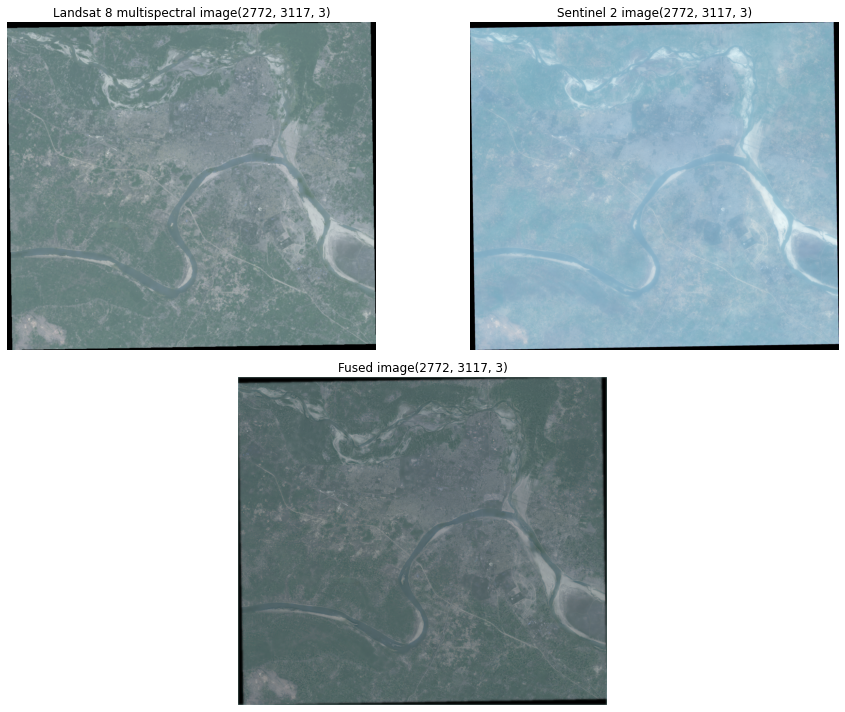

In [ ]:
vis_fus = np.copy(img_fus)
vis_fus[:,:,0] = ((vis_fus[:,:,0]-np.amin(vis_fus[:,:,0]))/(np.amax(vis_fus[:,:,0])-np.amin(vis_fus[:,:,0])))*255
vis_fus[:,:,1] = ((vis_fus[:,:,1]-np.amin(vis_fus[:,:,1]))/(np.amax(vis_fus[:,:,1])-np.amin(vis_fus[:,:,1])))*255
vis_fus[:,:,2] = ((vis_fus[:,:,2]-np.amin(vis_fus[:,:,2]))/(np.amax(vis_fus[:,:,2])-np.amin(vis_fus[:,:,2])))*255
vis_fus = vis_fus.astype(int)

fig = plt.figure(figsize=(13, 10))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax0 = fig.add_subplot(spec[0,0])
ax0.imshow(L8_xs)
ax0.set_title("Landsat 8 multispectral image" + str(L8_xs.shape))
ax0.axis('off')

ax1 = fig.add_subplot(spec[0,1])
ax1.imshow(S2_xs)
ax1.set_title("Sentinel 2 image"  + str(S2_xs.shape))
ax1.axis('off')

ax2 = fig.add_subplot(spec[1,:])
ax2.imshow(vis_fus)
ax2.set_title("Fused image" + str(img_fus.shape))
ax2.axis('off')

plt.tight_layout()                           
